In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)
df = pd.read_csv('L:/Python Projects All/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [5]:
X = df.drop('sales',axis=1)
y = df['sales']
X.head(3)
y.head(3)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [11]:
polynomial_converter.fit(X)
X2 = polynomial_converter.transform(X)
X2.shape

(200, 9)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train , x_test , y_train , y_test = train_test_split(X2 , y , test_size=0.33 , random_state=101)
mymodel = LinearRegression()
mymodel.fit(x_train , y_train)
predictions = mymodel.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mae = mean_absolute_error(y_test , predictions)
mse = mean_absolute_error(y_test , predictions)
rmse = np.sqrt(mse)
print(mae , mse)

0.48428105352155904 0.48428105352155904


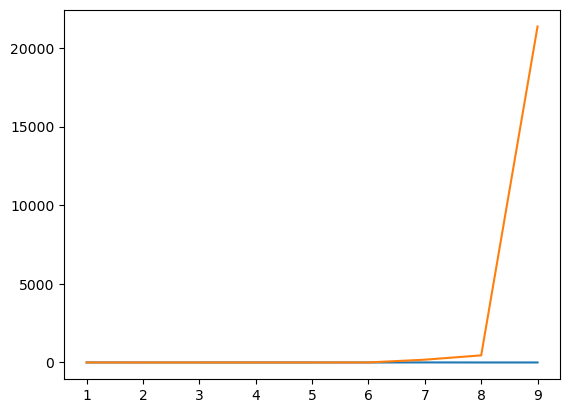

In [20]:
# Checking the degree
X = df.drop('sales',axis=1)
y = df['sales']
train_mae_arr = []
test_mae_arr = []

for d in range(1,10):
    poly_fit = PolynomialFeatures(degree=d , include_bias=False)
    poly_features = poly_fit.fit_transform(X)
    x_train , x_test , y_train , y_test = train_test_split(poly_features , y , test_size=0.33 , random_state=101)
    mymodel = LinearRegression()
    mymodel.fit(x_train , y_train)
    predict_train = mymodel.predict(x_train)
    train_mae = mean_absolute_error(y_train , predict_train)
    predict_test = mymodel.predict(x_test)
    test_mae = mean_absolute_error(y_test , predict_test)
    train_mae_arr.append(train_mae)
    test_mae_arr.append(test_mae)

plt.plot(range(1,10) , train_mae_arr , label='Train MAE')
plt.plot(range(1,10) , test_mae_arr , label='Test MAE')

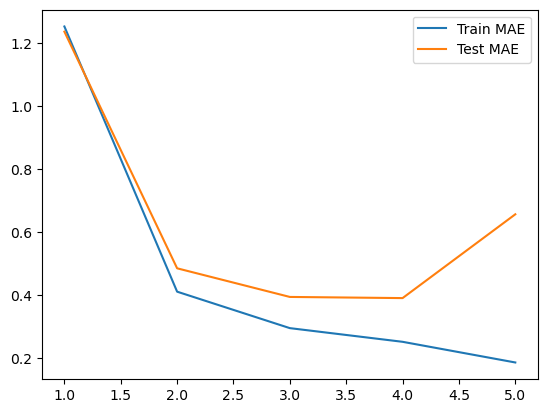

In [24]:
# Checking with RMSE
train_mae_arr2 = []
test_mae_arr2 = []

for d in range(1,10):
    poly_fit = PolynomialFeatures(degree=d , include_bias=False)
    poly_features = poly_fit.fit_transform(X)
    x_train , x_test , y_train , y_test = train_test_split(poly_features , y , test_size=0.33 , random_state=42)
    mymodel = LinearRegression()
    mymodel.fit(x_train , y_train)
    predict_train = mymodel.predict(x_train)
    train_mae = mean_squared_error(y_train , predict_train)
    predict_test = mymodel.predict(x_test)
    test_mae = mean_squared_error(y_test , predict_test)
    train_mae_arr2.append(np.sqrt(train_mae))
    test_mae_arr2.append(np.sqrt(test_mae))

plt.plot(range(1,6) , train_mae_arr[:5] , label='Train MAE')
plt.plot(range(1,6) , test_mae_arr[:5] , label='Test MAE')
plt.legend()

In [18]:
test_mae_arr2

[1.5324409426512415,
 0.6482912032533674,
 0.5577254823365251,
 0.5064297307498219,
 2.3573610784372336,
 11.21771417886336,
 1194.3666980368562,
 3468.9957768098748,
 166098.4151585643]

In [22]:
train_mae_arr2

[1.5526939990087723,
 0.6057702019226606,
 0.4756847293184338,
 0.37429879089338153,
 0.24108757572467526,
 0.194993741540385,
 3.548002510099389,
 0.11467946704992606,
 0.11468750277640444]